In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.isotonic import IsotonicRegression
from scipy.special import logit,expit
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import confusion_matrix

Let's create a dataset with certain characteristics to study the fenomena

In [94]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2,random_state=0)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

In [95]:
df

,x,y,label
0,2.631858,0.689365,1
1,0.080804,4.690690,0
2,3.002519,0.742654,1
3,-0.637628,4.091047,0
4,-0.072283,2.883769,0
...,...,...,...
95,-0.338874,3.234825,2
96,1.289338,3.449692,0
97,1.840706,3.561622,0
98,-0.901673,1.315825,2


In [96]:
df_app=pd.DataFrame()
df_app['x']=[-3,-2.7,0,3]
df_app['y']=[5.1,4,6,5]
df_app['label']=[1,1,2,2]

In [97]:
df=df.append(df_app)

In [98]:
df=df.reset_index().drop('index',axis=1)

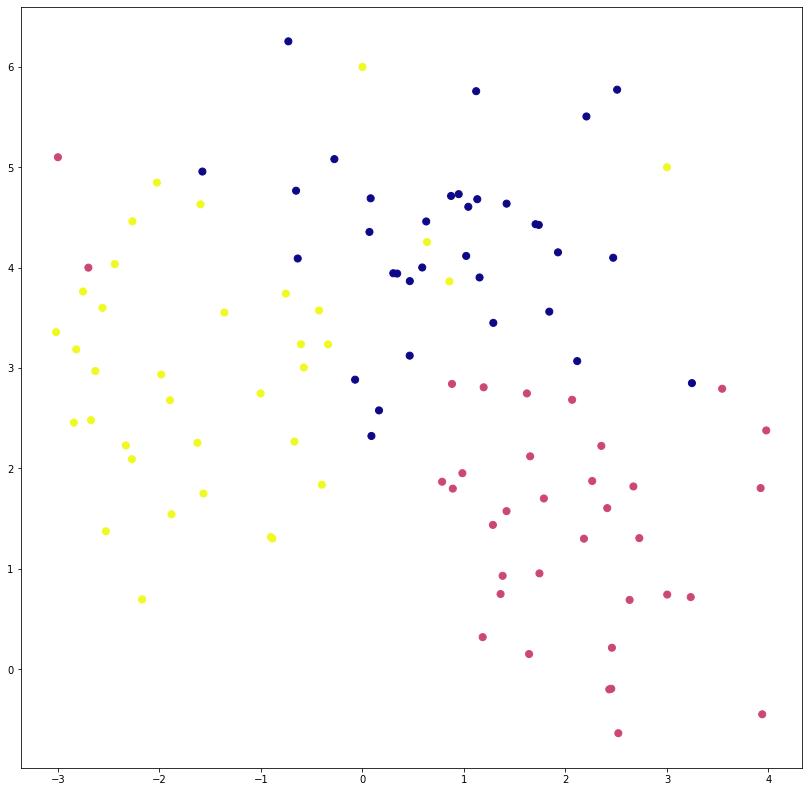

In [99]:
fig,ax=plt.subplots(1,1,figsize=(14,14))
plt.scatter(df['x'], df['y'], s=50, c=df.label, cmap='plasma')

In [100]:
df['first']=(df['label']>0).astype(int)
df['second']=(df['label']>1).astype(int)
df

,x,y,label,first,second
0,2.631858,0.689365,1,1,0
1,0.080804,4.690690,0,0,0
2,3.002519,0.742654,1,1,0
3,-0.637628,4.091047,0,0,0
4,-0.072283,2.883769,0,0,0
...,...,...,...,...,...
99,-2.752340,3.762245,2,1,1
100,-3.000000,5.100000,1,1,0
101,-2.700000,4.000000,1,1,0
102,0.000000,6.000000,2,1,1


In [101]:
X=df[['x','y']]
Y=df['first']

In [102]:
log1=LogisticRegression(random_state=1)
log1.fit(X,Y)
predictions=log1.predict(X)
df['first_pred']=predictions

In [103]:
df=pd.merge(df,pd.DataFrame(log1.predict_proba(X)).rename(columns={0: 'fir_prob=0', 1: 'fir_prob=1'}),left_index=True,right_index=True)


In [104]:
Y=df['second']
log2=LogisticRegression(random_state=1)
log2.fit(X,Y)
predictions=log2.predict(X)
df['second_pred']=predictions

In [105]:
df=pd.merge(df,pd.DataFrame(log2.predict_proba(X)).rename(columns={0: 'sec_prob=0', 1: 'sec_prob=1'}),left_index=True,right_index=True)
df

,x,y,label,first,second,first_pred,fir_prob=0,fir_prob=1,second_pred,sec_prob=0,sec_prob=1
0,2.631858,0.689365,1,1,0,1,0.038175,0.961825,0,0.967913,0.032087
1,0.080804,4.690690,0,0,0,0,0.740290,0.259710,0,0.767095,0.232905
2,3.002519,0.742654,1,1,0,1,0.050570,0.949430,0,0.980024,0.019976
3,-0.637628,4.091047,0,0,0,1,0.440682,0.559318,0,0.530121,0.469879
4,-0.072283,2.883769,0,0,0,1,0.161407,0.838593,0,0.629093,0.370907
...,...,...,...,...,...,...,...,...,...,...,...
99,-2.752340,3.762245,2,1,1,1,0.124299,0.875701,1,0.065344,0.934656
100,-3.000000,5.100000,1,1,0,1,0.457965,0.542035,1,0.067270,0.932730
101,-2.700000,4.000000,1,1,0,1,0.170963,0.829037,1,0.073635,0.926365
102,0.000000,6.000000,2,1,1,0,0.947254,0.052746,0,0.806659,0.193341


### Plots

First logistic regression

In [106]:
b1=log1.coef_[0][0]
b1

-0.586284025233833

In [107]:
b2=log1.coef_[0][1]
b2

-1.4419666906360549

In [108]:
b0=(log1.intercept_)[0]
b0

5.763717201544984

In [109]:
x1=np.linspace(-3.5,4,100)
y1=-b1/b2*x1-b0/b2

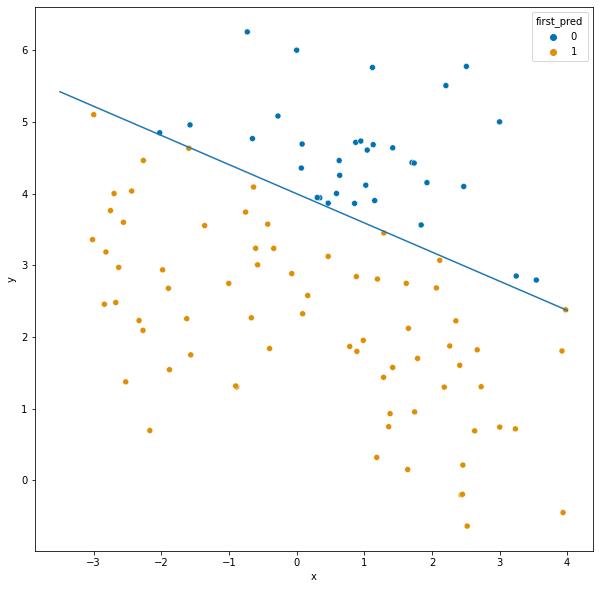

In [110]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
sn.scatterplot(data=df,x='x', y='y', hue=df.first_pred, palette='colorblind')
plt.plot(x1,y1)
plt.show()

Second logistic regression

In [111]:
b4=log2.coef_[0][0]
b4

-1.274830761630989

In [112]:
b5=log2.coef_[0][1]
b5

-0.2592766655352332

In [113]:
b3=log2.intercept_[0]
b3

0.12721628982926508

In [114]:
x2=np.linspace(-1.25,0.25,100)
y2=-b4/b5*x2-b3/b5

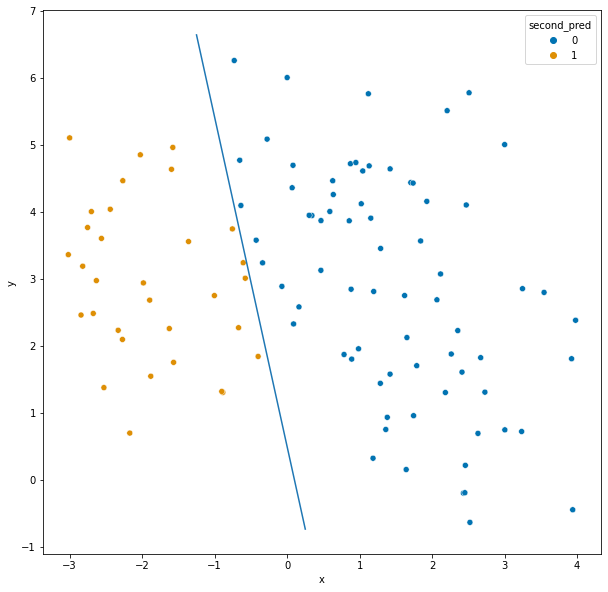

In [115]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
sn.scatterplot(data=df,x='x', y='y', hue=df.second_pred, palette='colorblind')
plt.plot(x2,y2)
plt.show()

Final plot

In [116]:
df['final_pred']=(((df['first_pred']==1).astype(int)+(df['second_pred']==1).astype(int))
                  *(df['first_pred']>=df['second_pred']).astype(int))-1*(df['first_pred']<df['second_pred']).astype(int)

df

,x,y,label,first,second,first_pred,fir_prob=0,fir_prob=1,second_pred,sec_prob=0,sec_prob=1,final_pred
0,2.631858,0.689365,1,1,0,1,0.038175,0.961825,0,0.967913,0.032087,1
1,0.080804,4.690690,0,0,0,0,0.740290,0.259710,0,0.767095,0.232905,0
2,3.002519,0.742654,1,1,0,1,0.050570,0.949430,0,0.980024,0.019976,1
3,-0.637628,4.091047,0,0,0,1,0.440682,0.559318,0,0.530121,0.469879,1
4,-0.072283,2.883769,0,0,0,1,0.161407,0.838593,0,0.629093,0.370907,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99,-2.752340,3.762245,2,1,1,1,0.124299,0.875701,1,0.065344,0.934656,2
100,-3.000000,5.100000,1,1,0,1,0.457965,0.542035,1,0.067270,0.932730,2
101,-2.700000,4.000000,1,1,0,1,0.170963,0.829037,1,0.073635,0.926365,2
102,0.000000,6.000000,2,1,1,0,0.947254,0.052746,0,0.806659,0.193341,0


In [117]:
df['final_pred'].loc[54]='unknown'

/Applications/anaconda/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [118]:
df['final_pred'].loc[72]='unknown'
df['final_pred'].loc[72]

'unknown'

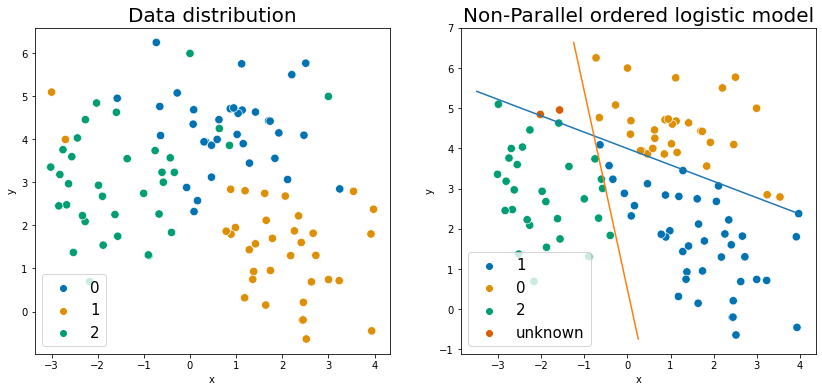

In [126]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sn.scatterplot(data=df,x='x', y='y', hue=df.label,palette='colorblind',ax=ax[0],s=70)
sn.scatterplot(data=df,x='x', y='y', hue=df.final_pred,palette='colorblind',ax=ax[1],s=70)
ax[1].plot(x1,y1)
ax[1].plot(x2,y2)
ax[0].set_title('Data distribution', fontsize=20)
ax[1].set_title('Non-Parallel ordered logistic model',fontsize=20)
ax[0].legend(prop={'size':15},loc='lower left')
ax[1].legend(prop={'size':15},loc='lower left')
plt.show()

### correction with isotonic regression

In [127]:
#find the data that present the issue
df[(df['first_pred']==0)&(df['second_pred']==1)]

,x,y,label,first,second,first_pred,fir_prob=0,fir_prob=1,second_pred,sec_prob=0,sec_prob=1,final_pred
54,-2.024936,4.847414,2,1,1,0,0.509725,0.490275,1,0.189718,0.810282,unknown
72,-1.576720,4.957406,0,0,0,0,0.613083,0.386917,1,0.299029,0.700971,unknown


In [128]:
#define isotonic regression and our data
iso=IsotonicRegression(increasing=False)
x=[1,2]
y1=[]
y2=[]
y1.append(df.iloc[54]['fir_prob=1'])
y1.append(df.iloc[54]['sec_prob=1'])
y2.append(df.iloc[72]['fir_prob=1'])
y2.append(df.iloc[72]['sec_prob=1'])

In [129]:
y1_ = iso.fit_transform(x, y1)
y2_ = iso.fit_transform(x, y2)

Let's print the new predicted probabilities

In [130]:
print(y1_)
print(y2_)

[0.6502787 0.6502787]
[0.543944 0.543944]


In [131]:
df.first_pred.loc[54]=1
df.first_pred.loc[72]=1

/Applications/anaconda/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [132]:
#check if it worked
df[(df['first_pred']==0)&(df['second_pred']==1)]

,x,y,label,first,second,first_pred,fir_prob=0,fir_prob=1,second_pred,sec_prob=0,sec_prob=1,final_pred


In [133]:
df['final_pred']=(df['first_pred']==1).astype(int)+(df['second_pred']==1).astype(int)
df

,x,y,label,first,second,first_pred,fir_prob=0,fir_prob=1,second_pred,sec_prob=0,sec_prob=1,final_pred
0,2.631858,0.689365,1,1,0,1,0.038175,0.961825,0,0.967913,0.032087,1
1,0.080804,4.690690,0,0,0,0,0.740290,0.259710,0,0.767095,0.232905,0
2,3.002519,0.742654,1,1,0,1,0.050570,0.949430,0,0.980024,0.019976,1
3,-0.637628,4.091047,0,0,0,1,0.440682,0.559318,0,0.530121,0.469879,1
4,-0.072283,2.883769,0,0,0,1,0.161407,0.838593,0,0.629093,0.370907,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99,-2.752340,3.762245,2,1,1,1,0.124299,0.875701,1,0.065344,0.934656,2
100,-3.000000,5.100000,1,1,0,1,0.457965,0.542035,1,0.067270,0.932730,2
101,-2.700000,4.000000,1,1,0,1,0.170963,0.829037,1,0.073635,0.926365,2
102,0.000000,6.000000,2,1,1,0,0.947254,0.052746,0,0.806659,0.193341,0


In [134]:
x1=np.linspace(-3.5,4,100)
y1=-b1/b2*x1-b0/b2
x2=np.linspace(-1.25,0.25,100)
y2=-b4/b5*x2-b3/b5

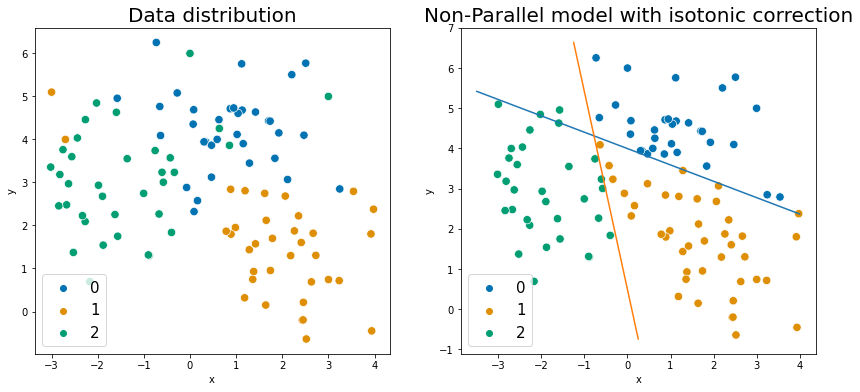

In [135]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sn.scatterplot(data=df,x='x', y='y', hue=df.label,palette='colorblind',ax=ax[0],s=70)
sn.scatterplot(data=df,x='x', y='y', hue=df.final_pred,palette='colorblind',ax=ax[1],s=70)
ax[1].plot(x1,y1)
ax[1].plot(x2,y2)
ax[0].set_title('Data distribution',size=20)
ax[1].set_title('Non-Parallel model with isotonic correction',size=20)
ax[0].legend(prop={'size':15},loc='lower left')
ax[1].legend(prop={'size':15},loc='lower left')
plt.show()

### plot to compare the Pom and the non-parallel model

In [37]:
X, y = make_blobs(n_samples=500, centers=4, n_features=2,random_state=0)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

In [38]:
df

,x,y,label
0,2.633789,1.247318,1
1,4.359184,-0.162352,1
2,1.022029,4.116603,0
3,-0.179912,5.084985,0
4,0.748741,2.555794,1
...,...,...,...
495,1.142944,4.938819,0
496,1.000639,1.717911,1
497,-2.608037,7.794059,3
498,-0.767141,10.594815,3


In [39]:
X=df[['x','y']]
Y=df['label']

In [40]:
mod_log = OrderedModel(Y,X,distr='logit')
res_log = mod_log.fit()
res_log.summary()

Optimization terminated successfully.
         Current function value: 1.114338
         Iterations: 300
         Function evaluations: 498


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  label   Log-Likelihood:                -557.17
Model:                   OrderedModel   AIC:                             1124.
Method:            Maximum Likelihood   BIC:                             1145.
Date:                Wed, 12 Jan 2022                                         
Time:                        09:53:50                                         
No. Observations:                 500                                         
Df Residuals:                     495                                         
Df Model:                           5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x             -0.5712      0.057    -10.037      0.000      -0.683      -0.460
y              0.2914      0.037      7.878      0.000       0.219       0.364
0/1           -0.7511      0.164     -4.582      0.000      -1.072      -0.430
1/2            0.4361      0.083      5.223      0.000       0.272       0.600
2/3            0.6808      0.082      8.304      0.000       0.520       0.841
==============================================================================
"""

In [41]:
predicted = res_log.model.predict(res_log.params, exog=X)
predictions=pd.DataFrame(predicted)
pred=predictions.idxmax(axis=1)
pred=pred.to_frame().rename(columns={0: 'Parallel_pred'})
pred

/Applications/anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/miscmodels/ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


,Parallel_pred
0,0
1,0
2,2
3,2
4,1
...,...
495,2
496,1
497,3
498,3


In [42]:
df=pd.merge(df,pred,left_index=True, right_index=True)
df

,x,y,label,Parallel_pred
0,2.633789,1.247318,1,0
1,4.359184,-0.162352,1,0
2,1.022029,4.116603,0,2
3,-0.179912,5.084985,0,2
4,0.748741,2.555794,1,1
...,...,...,...,...
495,1.142944,4.938819,0,2
496,1.000639,1.717911,1,1
497,-2.608037,7.794059,3,3
498,-0.767141,10.594815,3,3


In [43]:
df['first']=(df['label']>0).astype(int)
df['second']=(df['label']>1).astype(int)
df['third']=(df['label']>2).astype(int)

In [44]:
Y=df['first']

In [45]:
Log1=LogisticRegression().fit(X,Y)
predictions=Log1.predict(X)
df['first_pred']=predictions
df

,x,y,label,Parallel_pred,first,second,third,first_pred
0,2.633789,1.247318,1,0,1,0,0,1
1,4.359184,-0.162352,1,0,1,0,0,0
2,1.022029,4.116603,0,2,0,0,0,1
3,-0.179912,5.084985,0,2,0,0,0,1
4,0.748741,2.555794,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...
495,1.142944,4.938819,0,2,0,0,0,1
496,1.000639,1.717911,1,1,1,0,0,1
497,-2.608037,7.794059,3,3,1,1,1,1
498,-0.767141,10.594815,3,3,1,1,1,0


In [46]:
Y=df['second']
Log2=LogisticRegression().fit(X,Y)
predictions=Log2.predict(X)
df['second_pred']=predictions
df

,x,y,label,Parallel_pred,first,second,third,first_pred,second_pred
0,2.633789,1.247318,1,0,1,0,0,1,0
1,4.359184,-0.162352,1,0,1,0,0,0,0
2,1.022029,4.116603,0,2,0,0,0,1,0
3,-0.179912,5.084985,0,2,0,0,0,1,1
4,0.748741,2.555794,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
495,1.142944,4.938819,0,2,0,0,0,1,0
496,1.000639,1.717911,1,1,1,0,0,1,0
497,-2.608037,7.794059,3,3,1,1,1,1,1
498,-0.767141,10.594815,3,3,1,1,1,0,1


In [47]:
Y=df['third']
Log3=LogisticRegression().fit(X,Y)
predictions=Log3.predict(X)
df['third_pred']=predictions
df

,x,y,label,Parallel_pred,first,second,third,first_pred,second_pred,third_pred
0,2.633789,1.247318,1,0,1,0,0,1,0,0
1,4.359184,-0.162352,1,0,1,0,0,0,0,0
2,1.022029,4.116603,0,2,0,0,0,1,0,0
3,-0.179912,5.084985,0,2,0,0,0,1,1,0
4,0.748741,2.555794,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
495,1.142944,4.938819,0,2,0,0,0,1,0,0
496,1.000639,1.717911,1,1,1,0,0,1,0,0
497,-2.608037,7.794059,3,3,1,1,1,1,1,1
498,-0.767141,10.594815,3,3,1,1,1,0,1,1


In [48]:
df['Non_parallel_pred']=(df['first_pred']==1).astype(int)+(df['second_pred']==1).astype(int)+(df['third_pred']==1).astype(int)
df

,x,y,label,Parallel_pred,first,second,third,first_pred,second_pred,third_pred,Non_parallel_pred
0,2.633789,1.247318,1,0,1,0,0,1,0,0,1
1,4.359184,-0.162352,1,0,1,0,0,0,0,0,0
2,1.022029,4.116603,0,2,0,0,0,1,0,0,1
3,-0.179912,5.084985,0,2,0,0,0,1,1,0,2
4,0.748741,2.555794,1,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
495,1.142944,4.938819,0,2,0,0,0,1,0,0,1
496,1.000639,1.717911,1,1,1,0,0,1,0,0,1
497,-2.608037,7.794059,3,3,1,1,1,1,1,1,3
498,-0.767141,10.594815,3,3,1,1,1,0,1,1,2


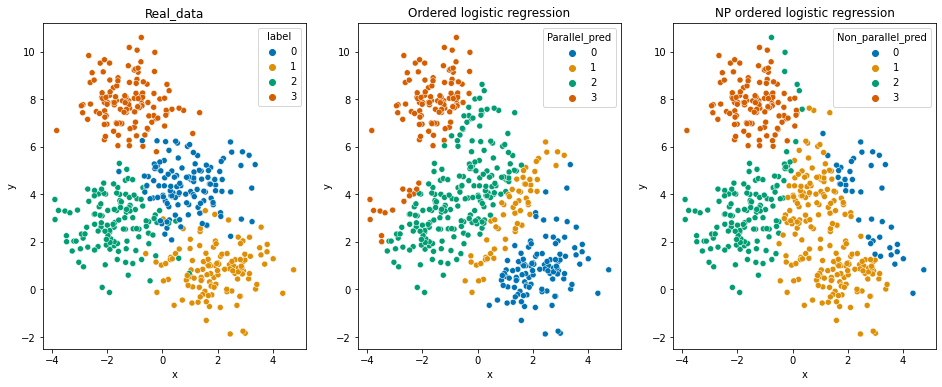

In [49]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
sn.scatterplot(data=df,x='x', y='y', hue=df.label, palette='colorblind',ax=ax[0])
sn.scatterplot(data=df,x='x', y='y', hue=df.Parallel_pred, palette='colorblind',ax=ax[1])
sn.scatterplot(data=df,x='x', y='y', hue=df.Non_parallel_pred, palette='colorblind',ax=ax[2])
ax[0].set_title('Real_data')
ax[1].set_title('Ordered logistic regression')
ax[2].set_title('NP ordered logistic regression')
plt.show()

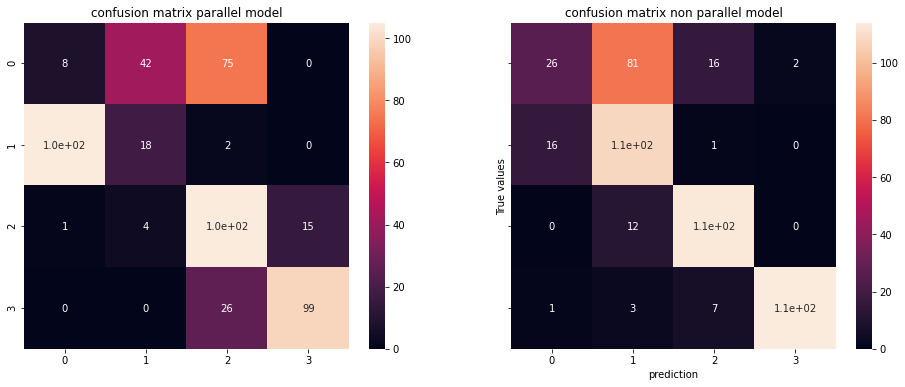

In [50]:
fig, ax=plt.subplots(1,2,figsize=(16,6),sharex=True,sharey=True)
cm1=confusion_matrix(df['label'],df['Parallel_pred'])
sn.heatmap(cm1,annot=True,ax=ax[0])
plt.xlabel('prediction')
plt.ylabel('True values')
ax[0].set_title('confusion matrix parallel model')
cm2=confusion_matrix(df['label'],df['Non_parallel_pred'])
sn.heatmap(cm2,annot=True)
plt.xlabel('prediction')
plt.ylabel('True values')
ax[1].set_title('confusion matrix non parallel model')
plt.show()


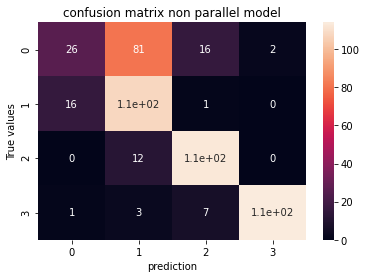

In [51]:
cm=confusion_matrix(df['label'],df['Non_parallel_pred'])
sn.heatmap(cm,annot=True)
plt.xlabel('prediction')
plt.ylabel('True values')
plt.title('confusion matrix non parallel model')
plt.show()